## Caracterización

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

data = "Datos_Icte_p.xlsx"
data = pd.read_excel(data)
data

,CorrienteCampo (A),B (mT),B_err (mT),B_rounded (mT),B_err_rounded (mT),VH_-20mA (mV),VH_-10mA (mV),VH_10mA (mV),VH_20mA (mV),VH_err (mV)
0,-1.4,-321.16,0.135558,-321.20,0.10,30.2,19.7,-11.2,-26.4,0.1
1,-1.2,-275.45,0.119013,-275.50,0.10,26.2,17.4,-9.8,-23.0,0.1
2,-1.0,-229.74,0.102956,-229.70,0.10,22.2,15.1,-8.3,-19.6,0.1
3,-0.8,-184.03,0.087658,-184.03,0.09,17.9,12.3,-6.6,-15.9,0.1
4,-0.6,-138.32,0.073593,-138.32,0.07,13.2,9.7,-4.8,-11.9,0.1
5,-0.4,-92.61,0.061612,-92.61,0.06,8.5,7.1,-3.0,-7.8,0.1
6,-0.2,-46.90,0.053141,-46.90,0.05,4.1,1.6,-1.1,-3.7,0.1
7,0.0,-1.19,0.050000,-1.19,0.05,1.0,1.0,0.9,0.3,0.1
8,0.2,44.52,0.053141,44.52,0.05,-3.5,-1.5,2.6,4.2,0.1
9,0.4,90.23,0.061612,90.23,0.06,-8.0,-4.2,4.5,8.2,0.1


In [2]:
X = data['B_rounded (mT)']
Xerr = data['B_err_rounded (mT)']

Y = data['VH_-20mA (mV)']
Yerr = data['VH_err (mV)']

w = 1/(Yerr**2)

In [3]:
sum_w = w.sum()
sum_wx = (w*X).sum()
sum_wy = (w*Y).sum()
sum_wxx = (w*X**2).sum()
sum_wxy = (w*X*Y).sum()

In [4]:
m = (sum_w*sum_wxy - sum_wx*sum_wy) / (sum_w*sum_wxx - sum_wx**2)
b = (sum_wxx*sum_wy - sum_wx*sum_wxy) / (sum_w*sum_wxx - sum_wx**2)

m_std_err = np.sqrt(sum_w/(sum_w*sum_wxx-sum_wx**2))
b_std_err = np.sqrt(sum_wxx/(sum_w*sum_wxx-sum_wx**2))

In [5]:
print(m)
print(b)

print(m_std_err)
print(b_std_err)

-0.09503346141401475
0.11383027014776081
0.00013073119253263727
0.025820355543282828


In [6]:
model1 = (-0.0950)*X + (0.11)

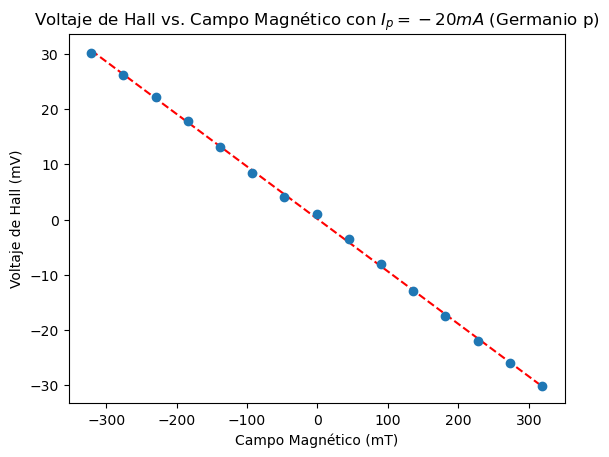

In [7]:
plt.errorbar(X, Y, Yerr, Xerr,  fmt='o')
plt.plot(X, model1, color = 'red', linestyle='--')
plt.title('Voltaje de Hall vs. Campo Magnético con ' + r'$I_p = -20mA$' + ' (Germanio p)')
plt.xlabel('Campo Magnético (mT)')
plt.ylabel('Voltaje de Hall (mV)')
plt.savefig('Icte_p_-20mA.png', format='png')

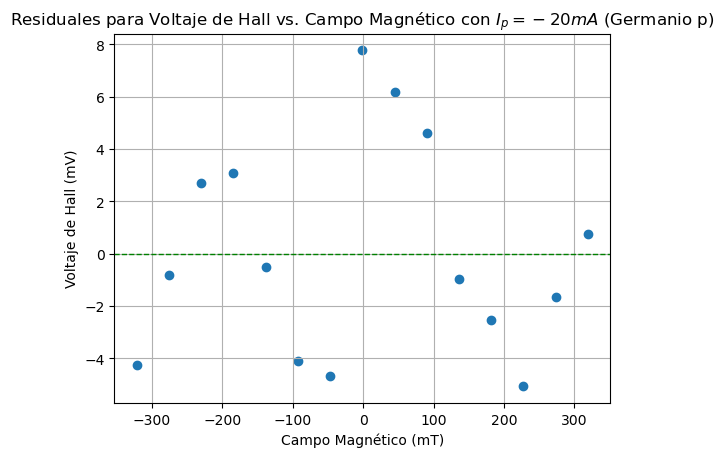

In [8]:
res = (Y - model1)/Yerr

fig2, (ax2) = plt.subplots(1, 1)

ax2.scatter(X, res)
ax2.axhline(0, color='green', linewidth=1, linestyle='--')

ax2.set_xlabel('Campo Magnético (mT)')
ax2.set_ylabel('Voltaje de Hall (mV)')
ax2.set_title('Residuales para Voltaje de Hall vs. Campo Magnético con ' + r'$I_p = -20mA$' + ' (Germanio p)')
ax2.grid()

plt.savefig('Icte_p_-20mA_residual.png', format='png')

In [9]:
Y = data['VH_-10mA (mV)']

w = 1/(Yerr**2)

In [10]:
sum_w = w.sum()
sum_wx = (w*X).sum()
sum_wy = (w*Y).sum()
sum_wxx = (w*X**2).sum()
sum_wxy = (w*X*Y).sum()

In [11]:
m = (sum_w*sum_wxy - sum_wx*sum_wy) / (sum_w*sum_wxx - sum_wx**2)
b = (sum_wxx*sum_wy - sum_wx*sum_wxy) / (sum_w*sum_wxx - sum_wx**2)

m_std_err = np.sqrt(sum_w/(sum_w*sum_wxx-sum_wx**2))
b_std_err = np.sqrt(sum_wxx/(sum_w*sum_wxx-sum_wx**2))

In [12]:
print(m)
print(b)

print(m_std_err)
print(b_std_err)

-0.05811067115233892
1.1710032631184564
0.00013073119253263727
0.025820355543282828


In [13]:
model2 = (-0.0581)*X + (1.17)

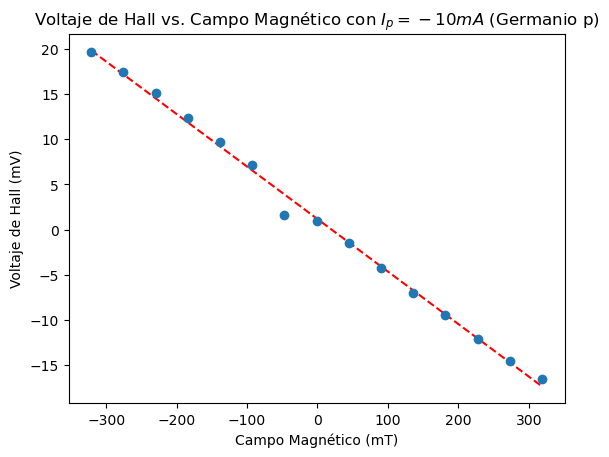

In [14]:
plt.errorbar(X, Y, Yerr, Xerr,  fmt='o')
plt.plot(X, model2, color = 'red', linestyle='--')
plt.title('Voltaje de Hall vs. Campo Magnético con ' + r'$I_p = -10mA$' + ' (Germanio p)')
plt.xlabel('Campo Magnético (mT)')
plt.ylabel('Voltaje de Hall (mV)')
plt.savefig('Icte_p_-10mA.png', format='png')

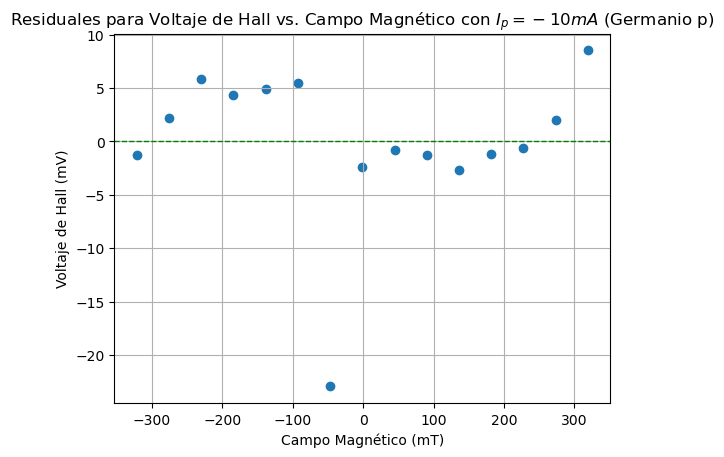

In [15]:
res = (Y - model2)/Yerr

fig2, (ax2) = plt.subplots(1, 1)

ax2.scatter(X, res)
ax2.axhline(0, color='green', linewidth=1, linestyle='--')

ax2.set_xlabel('Campo Magnético (mT)')
ax2.set_ylabel('Voltaje de Hall (mV)')
ax2.set_title('Residuales para Voltaje de Hall vs. Campo Magnético con ' + r'$I_p = -10mA$' + ' (Germanio p)')
ax2.grid()

plt.savefig('Icte_p_-10mA_residual.png', format='png')

In [16]:
Y = data['VH_10mA (mV)']

w = 1/(Yerr**2)

In [17]:
sum_w = w.sum()
sum_wx = (w*X).sum()
sum_wy = (w*Y).sum()
sum_wxx = (w*X**2).sum()
sum_wxy = (w*X*Y).sum()

In [18]:
m = (sum_w*sum_wxy - sum_wx*sum_wy) / (sum_w*sum_wxx - sum_wx**2)
b = (sum_wxx*sum_wy - sum_wx*sum_wxy) / (sum_w*sum_wxx - sum_wx**2)

m_std_err = np.sqrt(sum_w/(sum_w*sum_wxx-sum_wx**2))
b_std_err = np.sqrt(sum_wxx/(sum_w*sum_wxx-sum_wx**2))

In [19]:
print(m)
print(b)

print(m_std_err)
print(b_std_err)

0.038735230686504085
0.8126582972351089
0.00013073119253263727
0.025820355543282828


In [20]:
model3 = (0.0387)*X + (0.81)

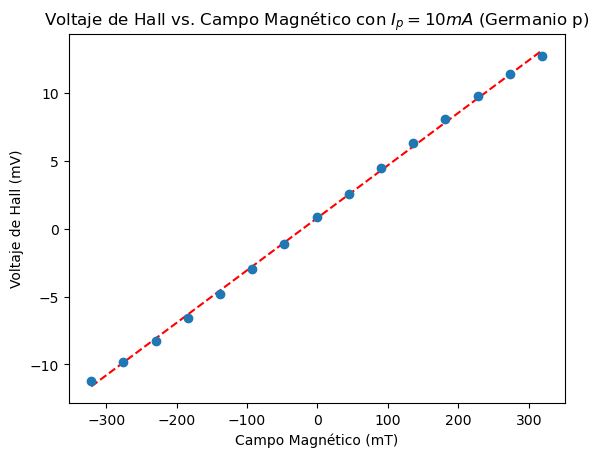

In [21]:
plt.errorbar(X, Y, Yerr, Xerr,  fmt='o')
plt.plot(X, model3, color = 'red', linestyle='--')
plt.title('Voltaje de Hall vs. Campo Magnético con ' + r'$I_p = 10mA$' + ' (Germanio p)')
plt.xlabel('Campo Magnético (mT)')
plt.ylabel('Voltaje de Hall (mV)')
plt.savefig('Icte_p_10mA.png', format='png')

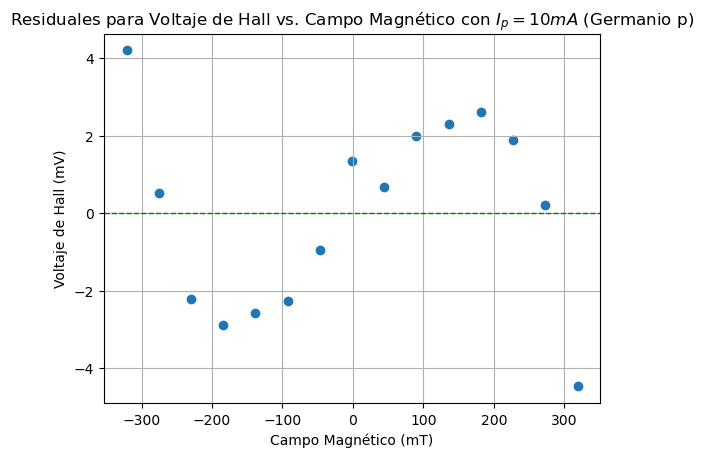

In [22]:
res = (Y - model3)/Yerr

fig2, (ax2) = plt.subplots(1, 1)

ax2.scatter(X, res)
ax2.axhline(0, color='green', linewidth=1, linestyle='--')

ax2.set_xlabel('Campo Magnético (mT)')
ax2.set_ylabel('Voltaje de Hall (mV)')
ax2.set_title('Residuales para Voltaje de Hall vs. Campo Magnético con ' + r'$I_p = 10mA$' + ' (Germanio p)')
ax2.grid()

plt.savefig('Icte_p_10mA_residual.png', format='png')

In [23]:
Y = data['VH_20mA (mV)']

w = 1/(Yerr**2)

In [24]:
sum_w = w.sum()
sum_wx = (w*X).sum()
sum_wy = (w*Y).sum()
sum_wxx = (w*X**2).sum()
sum_wxy = (w*X*Y).sum()

In [25]:
m = (sum_w*sum_wxy - sum_wx*sum_wy) / (sum_w*sum_wxx - sum_wx**2)
b = (sum_wxx*sum_wy - sum_wx*sum_wxy) / (sum_w*sum_wxx - sum_wx**2)

m_std_err = np.sqrt(sum_w/(sum_w*sum_wxx-sum_wx**2))
b_std_err = np.sqrt(sum_wxx/(sum_w*sum_wxx-sum_wx**2))

In [26]:
print(m)
print(b)

print(m_std_err)
print(b_std_err)

0.0854316036116053
0.35476912402151195
0.00013073119253263727
0.025820355543282828


In [27]:
model4 = (0.0854)*X + (0.35)

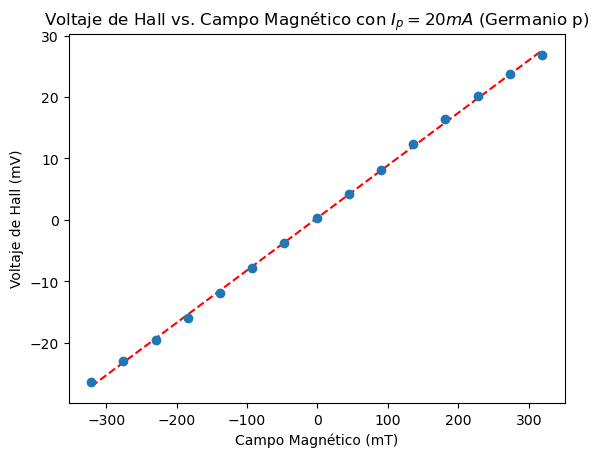

In [28]:
plt.errorbar(X, Y, Yerr, Xerr,  fmt='o')
plt.plot(X, model4, color = 'red', linestyle='--')
plt.title('Voltaje de Hall vs. Campo Magnético con ' + r'$I_p = 20mA$' + ' (Germanio p)')
plt.xlabel('Campo Magnético (mT)')
plt.ylabel('Voltaje de Hall (mV)')
plt.savefig('Icte_p_20mA.png', format='png')

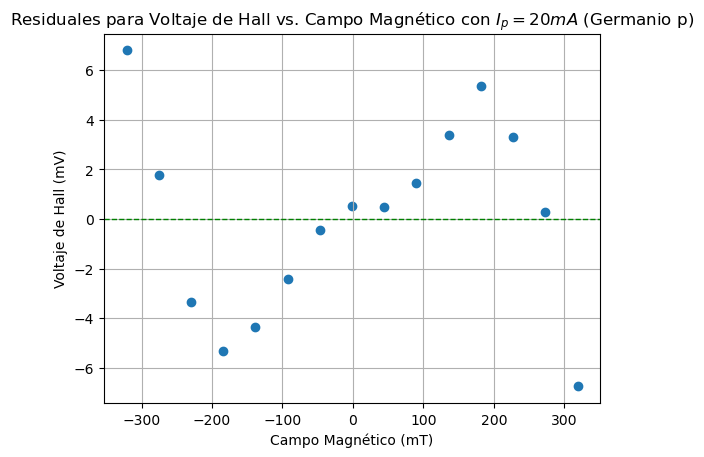

In [29]:
res = (Y - model4)/Yerr

fig2, (ax2) = plt.subplots(1, 1)

ax2.scatter(X, res)
ax2.axhline(0, color='green', linewidth=1, linestyle='--')

ax2.set_xlabel('Campo Magnético (mT)')
ax2.set_ylabel('Voltaje de Hall (mV)')
ax2.set_title('Residuales para Voltaje de Hall vs. Campo Magnético con ' + r'$I_p = 20mA$' + ' (Germanio p)')
ax2.grid()

plt.savefig('Icte_p_20mA_residual.png.png', format='png')

In [30]:
m1 = -0.0950
m2 = -0.0581
m3 = 0.0387
m4 = 0.0854

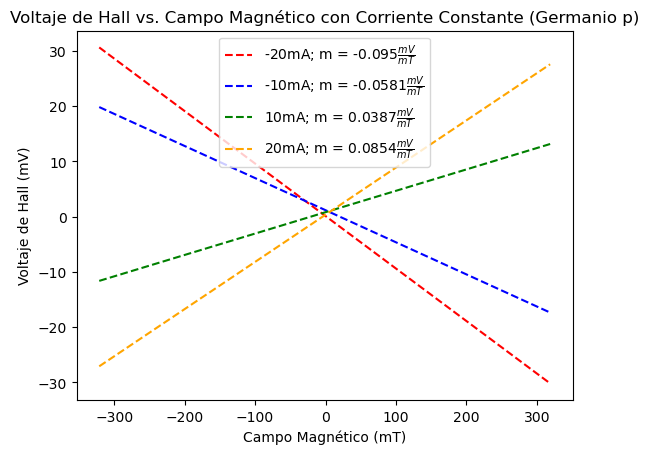

In [31]:
plt.plot(X, model1, color = 'red', linestyle='--', label='-20mA' + '; m = ' + str(m1) + r'$\frac{mV}{mT}$')
plt.plot(X, model2, color = 'blue', linestyle='--', label='-10mA' + '; m = ' + str(m2) + r'$\frac{mV}{mT}$')
plt.plot(X, model3, color = 'green', linestyle='--', label='10mA' + '; m = ' + str(m3) + r'$\frac{mV}{mT}$')
plt.plot(X, model4, color = 'orange', linestyle='--', label='20mA' + '; m = ' + str(m4) + r'$\frac{mV}{mT}$')
plt.legend(loc='upper center')
plt.xlabel('Campo Magnético (mT)')
plt.ylabel('Voltaje de Hall (mV)')
plt.title('Voltaje de Hall vs. Campo Magnético con Corriente Constante (Germanio p)')
plt.savefig('Graficas Icte_p_Todas.png', format='png')

In [32]:
def calculateRH(m, I):
    w = 1e-3
    I = I/1000
    return m*w/I

In [33]:
def calculateRH_error(m, I, sigma_m, sigma_I):
    w = 1e-3
    I = I/1000
    sigma_I = sigma_I/1000
    error = np.sqrt( ( (w/I)*sigma_m )**2 + ( (m*w/(I**2))*sigma_I )**2 )
    
    return error

In [34]:
RH1 = calculateRH(m1, -20)
RH1_error = calculateRH_error(m1, -20, 0.0001, 1)

RH2 = calculateRH(m2, -10)
RH2_error = calculateRH_error(m2, -10, 0.0001, 1)

RH3 = calculateRH(m3, 10)
RH3_error = calculateRH_error(m3, 10, 0.0001, 1)

RH4 = calculateRH(m4, 20)
RH4_error = calculateRH_error(m4, 20, 0.0001, 1)

In [35]:
print(RH1)
print(RH1_error)

0.00475
0.00023755262574848548


In [36]:
print(RH2)
print(RH2_error)

0.00581
0.000581086052147184


In [37]:
print(RH3)
print(RH3_error)

0.0038699999999999997
0.0003871291774072318


In [38]:
print(RH4)
print(RH4_error)

0.00427
0.00021355853998377122


In [39]:
RH_array = [RH1, RH2, RH3, RH4]
I_array = [-20, -10, 10, 20]

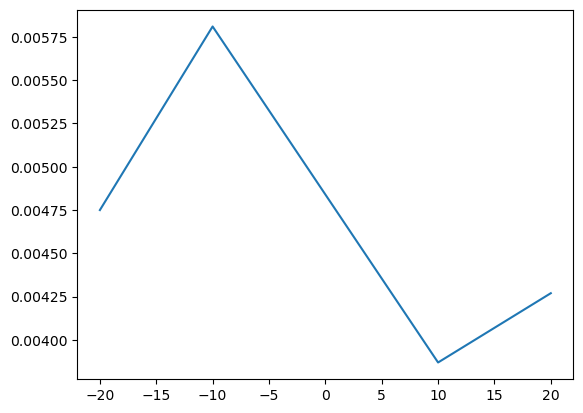

In [40]:
plt.plot(I_array, RH_array)

In [41]:
average_RH = (RH1 + RH2 + RH3 + RH4)/4
average_RH_error = np.sqrt( (RH1_error/4)**2 + (RH2_error/4)**2 + (RH3_error/4)**2 + (RH4_error/4)**2 )

print(average_RH)
print(average_RH_error)

0.004675
0.00019195841020908666
